In [1]:
import numpy as np
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import os
import cv2
import seaborn as sns
import torch
import torch.nn.functional as F
import math

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
path_train_high = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\AUTOENCONDER\dataset\train\high_res'
path_train_low = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\AUTOENCONDER\dataset\train\low_res'
path_val_high = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\AUTOENCONDER\dataset\val\high_res'
path_val_low = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\AUTOENCONDER\dataset\val\low_res'

In [4]:
#### Funcion para leer imagenes dentro de una carpeta
width = 256
height = 256
def imageReading (path):
    folderFilesids = os.listdir(path)
    images = np.zeros((len(folderFilesids), height, width))
    for count, n in enumerate(folderFilesids):
        path1 = path + '\\' + n
        originalImage = imread(path1)
        if (len(originalImage.shape)==3):
            originalImage = imread(path1)[:,:,2]
        #print(originalImage.shape)
        images[count] = originalImage
    imshow(images[0])
    plt.show()
    return images

C:\Users\ASUS\anaconda3\envs\pytorch\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


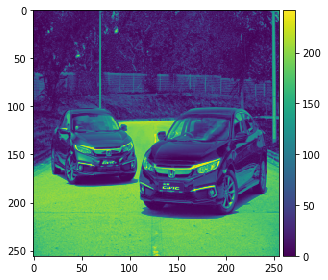

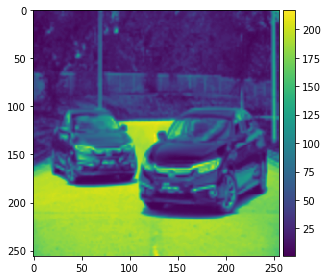

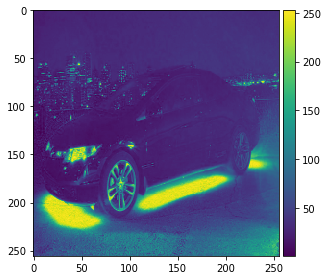

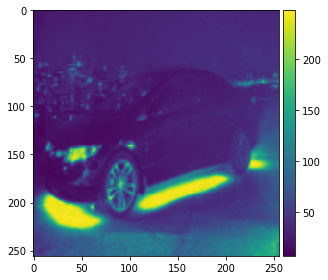

In [5]:
train_high = imageReading (path_train_high)
train_low = imageReading (path_train_low)
val_high = imageReading (path_val_high)
val_low = imageReading (path_val_low)

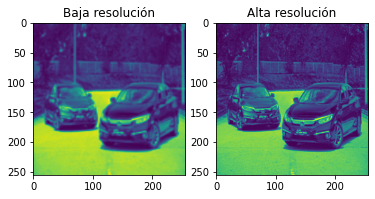

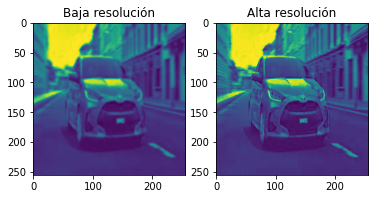

In [6]:
plt.figure(1)
plt.subplot(122)
plt.imshow(np.reshape(train_high[0],(256,256))),plt.title('Alta resolución')
plt.subplot(121),plt.imshow(np.reshape(train_low[0],(256,256))), plt.title('Baja resolución')
plt.show()

plt.figure(2)
plt.subplot(122)
plt.imshow(np.reshape(val_high[3],(256,256))),plt.title('Alta resolución')
plt.subplot(121),plt.imshow(np.reshape(val_low[3],(256,256))), plt.title('Baja resolución')
plt.show()


In [7]:
print(train_high.shape, train_low.shape, val_high.shape,val_low.shape)

(685, 256, 256) (685, 256, 256) (170, 256, 256) (170, 256, 256)


In [ ]:
'''
train_high = train_high[0:100,:]
train_low  = train_low[0:100,:]
vali_high = val_high[0:32,:]
vali_low = val_low[0:32,:]
test_high = val_high[32:48]
test_low = val_low[32:48]
'''

In [10]:
train_high = train_high
train_low  = train_low
vali_high = val_high[0:100,:]
vali_low = val_low[0:100,:]
test_high = val_high[101:,:]
test_low = val_low[101:,:]

In [11]:
print(train_high.shape, train_low.shape, vali_high.shape,vali_low.shape,test_high.shape,test_low.shape)

(685, 256, 256) (685, 256, 256) (100, 256, 256) (100, 256, 256) (69, 256, 256) (69, 256, 256)


In [12]:
train_high = torch.from_numpy(np.array(train_high).reshape(-1,1,256,256)).float() 
train_low = torch.from_numpy(np.array(train_low).reshape(-1,1,256,256)).float()
val_high = torch.from_numpy(np.array(vali_high).reshape(-1,1,256,256)).float() 
val_low = torch.from_numpy(np.array(vali_low).reshape(-1,1,256,256)).float()
test_high = torch.from_numpy(np.array(test_high).reshape(-1,1,256,256)).float() 
test_low = torch.from_numpy(np.array(test_low).reshape(-1,1,256,256)).float() 

In [13]:
print(train_high.shape, train_low.shape, val_high.shape,val_low.shape,test_high.shape,test_low.shape)

torch.Size([685, 1, 256, 256]) torch.Size([685, 1, 256, 256]) torch.Size([100, 1, 256, 256]) torch.Size([100, 1, 256, 256]) torch.Size([69, 1, 256, 256]) torch.Size([69, 1, 256, 256])


In [14]:
img_train = []
for i in range(train_high.shape[0]):
      img_train.append(((((train_low[i]/255.0)-0.5)*2),(((train_high[i]/255.0)-0.5)*2)))
        
img_val = []
for i in range(val_high.shape[0]):
      img_val.append(((((val_low[i]/255.0)-0.5)*2),(((val_high[i]/255.0)-0.5)*2)))
        
img_test = []
for i in range(test_high.shape[0]):
      img_test.append(((((test_low[i]/255.0)-0.5)*2),(((test_high[i]/255.0)-0.5)*2)))

In [15]:
print(len(img_train),len(img_val),len(img_test))

685 100 69


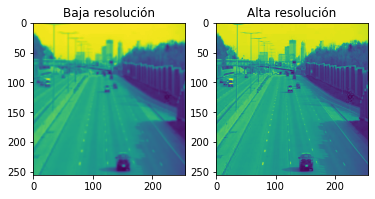

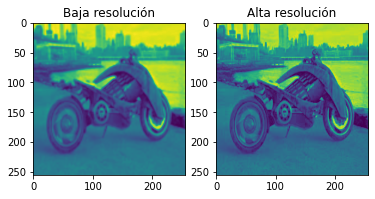

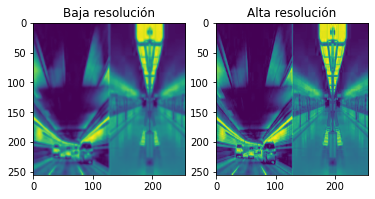

In [16]:
plt.figure(3)
plt.subplot(121)
plt.imshow(np.reshape(img_train[15][0],(256,256))),plt.title('Baja resolución')
plt.subplot(122),plt.imshow(np.reshape(img_train[15][1],(256,256))), plt.title('Alta resolución')
plt.show()
plt.figure(4)
plt.subplot(121)
plt.imshow(np.reshape(img_val[15][0],(256,256))),plt.title('Baja resolución')
plt.subplot(122),plt.imshow(np.reshape(img_val[15][1],(256,256))), plt.title('Alta resolución')
plt.show()
plt.figure(5)
plt.subplot(121)
plt.imshow(np.reshape(img_test[15][0],(256,256))),plt.title('Baja resolución')
plt.subplot(122),plt.imshow(np.reshape(img_test[15][1],(256,256))), plt.title('Alta resolución')
plt.show()


In [17]:
batch_size = 16
train_loader = torch.utils.data.DataLoader(dataset=img_train, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=img_val, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=img_test, batch_size=batch_size, shuffle=True)

In [18]:
img_train[0][0].shape

torch.Size([1, 256, 256])

### Modelo

#### Modelo 2

In [19]:
 ################################FORWARD ENCODER####################################################
class Encoder2(nn.Module):
    def __init__(self):
        super(Encoder2, self).__init__()
        #input 256x256
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=2, stride=1, padding=0), #255
            nn.Tanh(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=2, stride=1, padding=0),#254
            nn.Tanh())
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True)) #127
            
        self.MaxPool = nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True) 
            
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=2, stride=1, padding=0), #126
            nn.Tanh(),
            nn.Conv2d(in_channels=64, out_channels=64, kerne56555l_size=2, stride=1, padding=0), #125
            nn.Tanh())
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True)) #63
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=2, stride=1, padding=0), #62
            nn.Tanh(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=2, stride=1, padding=0), #61
            nn.Tanh())
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True)) # 31
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2, stride=1, padding=0), #30
            nn.Tanh(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=2, stride=1, padding=0), #29
            nn.Tanh())
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True)) # 15
        
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=2, stride=1, padding=0), #14
            nn.Tanh())
            
        self.fc = nn.Linear(in_features=512*13*13, out_features=10)
        
    def forward(self, image):
        #print("image",image.shape)
            
        out0 = self.layer1(image)
        #print("out",out0.shape)
        out1,indice1 = self.MaxPool(out0)
        #print("out1",out1.shape)
            
        out2 = self.layer2(out1)
        #print("out2",out2.shape)
        out3,indice3 = self.MaxPool(out2)
        #print("out3",out3.shape)
            
        out4 = self.layer3(out3)
        #print("out4",out4.shape)
        out5,indice5 = self.MaxPool(out4)
        #print("out5",out5.shape)
            
        out6 = self.layer4(out5)
        #print("out6",out6.shape)
        out7,indice7 = self.MaxPool(out6)
        #print("out7",out7.shape)    
            
        out8 = self.layer5(out7)            
        #print("out8",out8.shape)
        out9 = out8.view(out8.size(0), -1)
        #print("outflatten1",out9.shape)
        z = self.fc(out9)    
        #print("latente enconder",z.shape)
        return z, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6
    
  ################################FORWARD DECODER####################################################
            
class Decoder2(nn.Module):
    def __init__(self):
        super(Decoder2, self).__init__()
        self.fc    = nn.Linear(in_features=10,out_features=512*13*13)
        self.layer1Deco = nn.Sequential(
            nn.ConvTranspose2d(in_channels=512,out_channels=256, kernel_size=2, stride=1, padding=0),
            nn.Tanh())
        
        self.unpool = nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0)
        
        self.layer2Deco = nn.Sequential(
            #nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0), # 13
            nn.ConvTranspose2d(in_channels=256, out_channels=256, kernel_size=2, stride=1, padding=0), #25
            nn.Tanh(),
            nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=2, stride=1, padding=0), #27
            nn.Tanh())
        
        self.layer3Deco = nn.Sequential(
            #nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0), # 13
            nn.ConvTranspose2d(in_channels=128, out_channels=128, kernel_size=2, stride=1, padding=0), #59
            nn.Tanh(),
            nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=2, stride=1, padding=0), #57
            nn.Tanh())
        
        self.layer4Deco = nn.Sequential(
            #nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0), #6
            nn.ConvTranspose2d(in_channels=64, out_channels=64, kernel_size=2, stride=1, padding=0), #124
            nn.Tanh(),
            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=2, stride=1, padding=0), #122
            nn.Tanh())
        
        self.layer5Deco = nn.Sequential(
            #nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0), # 13
            nn.ConvTranspose2d(in_channels=32, out_channels=32, kernel_size=2, stride=1, padding=0), #27
            nn.Tanh(),
            nn.ConvTranspose2d(in_channels=32, out_channels=1, kernel_size=2, stride=1, padding=0), #25
            nn.Tanh())
           
        
    def forward(self, latent, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6):
        #print("latente decoder",latent.shape)
        out = self.fc(latent)
        #print("latente decoder-fc",out.shape)
        out = out.view(out.size(0), 512, 13, 13)
        #print("latente convertida",out.shape)
        out = self.layer1Deco(out)
        #print("layer1Deco",out.shape)
        
        out = self.unpool(out,indice7,output_size=out6.size())
        #print("unpooling",out.shape)
        out = self.layer2Deco(out)
        #print("layer2Deco",out.shape)
        
        out = self.unpool(out,indice5,output_size=out4.size())
        #print("unpooling2",out.shape)
        out = self.layer3Deco(out)
        #print("layer3Deco",out.shape)
        
        out = self.unpool(out,indice3,output_size=out2.size())
        #print("unpooling2",out.shape)
        out = self.layer4Deco(out)
        #print("layer4Deco",out.shape)
        
        out = self.unpool(out,indice1,output_size=out0.size())
        #print("unpooling2",out.shape)
        out = self.layer5Deco(out)
        #print("layer5Deco",out.shape)
        
        return out

In [20]:
class Autoencoder2(nn.Module):
    def __init__(self):
        super(Autoencoder2, self).__init__()
        self.encoder = Encoder2()
        self.decoder = Decoder2()

    def forward(self, x):
        latent, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6 = self.encoder(x.float())
        x_recon = self.decoder(latent, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6)
        return  x_recon

In [21]:
def train(model, train_loader, Epochs, loss_fn):
    train_loss_avg = []
    val_loss_avg = []
    for epoch in range(Epochs):
        train_loss_avg.append(0)
        num_batches = 0
        
        
        for image_batch_low,image_batch_high in train_loader:
            image_batch_low = image_batch_low.to(device)
            image_batch_high = image_batch_high.to(device)
            
            
            #print(image_batch.size())
            #print(image_batch)
            
            image_batch_recon = model(image_batch_low)
            # print(image_batch_recon.size())        
           
            
            loss = loss_fn(image_batch_recon, image_batch_high)
            #print("el loss es :",loss)  
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
          
            train_loss_avg[-1] += loss.item()
            num_batches += 1
          
        train_loss_avg[-1] /= num_batches
        #print('Epoch [%d / %d] average reconstruction error: %f' % (epoch+1, Epochs, train_loss_avg[-1]))
        
        val_loss_avg.append(0)
        num_batches = 0  
        for image_batch_low, image_batch_high in val_loader:
            image_batch_low = image_batch_low.to(device)
            image_batch_high = image_batch_high.to(device)

            image_batch_recon = model(image_batch_low)

            loss = loss_fn(image_batch_recon, image_batch_high)
            # Calculate loss
            val_loss_avg[-1] +=loss.item()
            num_batches += 1
            
        val_loss_avg[-1] /= num_batches

        print(f'Epoch {epoch+1} Training Loss: {train_loss_avg[-1]} Validation Loss: {val_loss_avg[-1]}')
 
    return train_loss_avg, val_loss_avg

In [22]:
%%time   
learning_rate = 0.001
autoencoder = Autoencoder2().float()
autoencoder.to(device)
loss = nn.MSELoss()
optimizer = torch.optim.Adam(params=autoencoder.parameters(), lr=learning_rate, weight_decay=1e-5)

autoencoder.train()


list_loss_train,list_loss_validation = train(autoencoder,train_loader,20,loss)

Epoch 1 Training Loss: 0.35038081573885543 Validation Loss: 0.3330257705279759
Epoch 2 Training Loss: 0.3042331348324931 Validation Loss: 0.2946654345308031
Epoch 3 Training Loss: 0.28147903084754944 Validation Loss: 0.2508131755249841
Epoch 4 Training Loss: 0.23180567386538484 Validation Loss: 0.22937147106443131
Epoch 5 Training Loss: 0.21566668776578682 Validation Loss: 0.21829690039157867
Epoch 6 Training Loss: 0.23239587940448939 Validation Loss: 0.22744917018072947
Epoch 7 Training Loss: 0.2540965409472931 Validation Loss: 0.2503040220056261
Epoch 8 Training Loss: 0.2880773592826932 Validation Loss: 0.30387898853846956
Epoch 9 Training Loss: 0.2996086093575455 Validation Loss: 0.2829767231430326
Epoch 10 Training Loss: 0.2781330963899923 Validation Loss: 0.2765226683446339
Epoch 11 Training Loss: 0.2766332550104274 Validation Loss: 0.2587800089802061
Epoch 12 Training Loss: 0.2576585588760154 Validation Loss: 0.2303430097443717
Epoch 13 Training Loss: 0.2439724310886028 Validatio

In [23]:
list_loss_train,list_loss_validation

([0.35038081573885543,
  0.3042331348324931,
  0.28147903084754944,
  0.23180567386538484,
  0.21566668776578682,
  0.23239587940448939,
  0.2540965409472931,
  0.2880773592826932,
  0.2996086093575455,
  0.2781330963899923,
  0.2766332550104274,
  0.2576585588760154,
  0.2439724310886028,
  0.2600298409545144,
  0.2664651091015616,
  0.2640431856000146,
  0.25779757943264275,
  0.2407591637483863,
  0.24772123368673546,
  0.24212331307488819],
 [0.3330257705279759,
  0.2946654345308031,
  0.2508131755249841,
  0.22937147106443131,
  0.21829690039157867,
  0.22744917018072947,
  0.2503040220056261,
  0.30387898853846956,
  0.2829767231430326,
  0.2765226683446339,
  0.2587800089802061,
  0.2303430097443717,
  0.2602996549436024,
  0.29948795054640087,
  0.2468786005462919,
  0.24597873006548202,
  0.23878039632524764,
  0.21853742003440857,
  0.2591181844472885,
  0.2596995724099023])

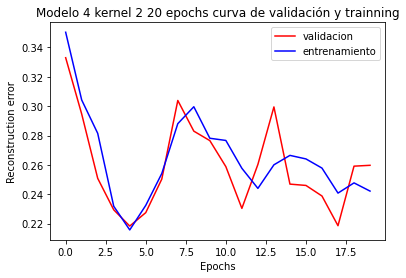

In [24]:
fig = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
#plt.plot(loss_result)
plt.title('Modelo 4 kernel 2 20 epochs curva de validación y trainning')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Reconstruction error')
plt.show()

In [25]:
def Show(out, title = ''):
    print(title)
    out = out.permute(1,0,2,3)
    grilla = torchvision.utils.make_grid(out,10,5)
    plt.imshow(transforms.ToPILImage()(grilla), 'jet')
    plt.show()

def Show_Weight(out):
    grilla = torchvision.utils.make_grid(out)
    plt.imshow(transforms.ToPILImage()(grilla), 'jet')
    plt.show()

In [27]:
capacity = 64
latent_dims = 10 
autoencoder.eval()


tensor = torch.zeros(len(test_loader),2)


with torch.no_grad():

    image,label = iter(test_loader).next()
    
    image = image.to(device)
    z, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6 = autoencoder.encoder(image) # Solo decoder para sacar el Z
    #print(z)
    print(z.shape)
    z = z.to('cpu')
    mean = z.mean(dim=0)

    std = (z - mean).pow(2).mean(dim=0).sqrt()

    z1 = torch.randn(16, latent_dims)*std + mean
    z1 = z1.to(device)
    print(z1.shape)
    decodificado = autoencoder.decoder(z1, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6)



    decodificado = decodificado.to('cpu')
    
    fig, ax = plt.subplots(figsize=(256, 256))
    Show_Weight(image[1:5])
    plt.show()
    fig, ax = plt.subplots(figsize=(256, 256))
    Show_Weight(decodificado[1:5])
    plt.show()
    

torch.Size([16, 10])
torch.Size([16, 10])
